In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("MarketPricePrediction.csv")
data.tail()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
10222,YEOLA(MS),December,2011,131326,282,612,526,MS,YEOLA,December-2011
10223,YEOLA(MS),December,2012,207066,485,1327,1136,MS,YEOLA,December-2012
10224,YEOLA(MS),December,2013,215883,472,1427,1177,MS,YEOLA,December-2013
10225,YEOLA(MS),December,2014,201077,446,1654,1456,MS,YEOLA,December-2014
10226,YEOLA(MS),December,2015,223315,609,1446,1126,MS,YEOLA,December-2015


In [3]:
data.isnull().sum()

market      0
month       0
year        0
quantity    0
priceMin    0
priceMax    0
priceMod    0
state       0
city        0
date        0
dtype: int64

In [4]:
data.duplicated().sum()

0

In [5]:
data.describe()

,year,quantity,priceMin,priceMax,priceMod
count,10227.000000,1.022700e+04,10227.000000,10227.000000,10227.000000
mean,2009.022294,7.660488e+04,646.944363,1212.760731,984.284345
std,4.372841,1.244087e+05,673.121850,979.658874,818.471498
min,1996.000000,2.000000e+01,16.000000,145.000000,80.000000
25%,2006.000000,8.898000e+03,209.000000,557.000000,448.000000
50%,2009.000000,2.746000e+04,440.000000,923.000000,747.000000
75%,2013.000000,8.835650e+04,828.000000,1527.000000,1248.000000
max,2016.000000,1.639032e+06,6000.000000,8192.000000,6400.000000


In [6]:
data['date']=pd.to_datetime(data['date'],format='%B-%Y')
data.set_index(['date'],inplace=True)

In [7]:
data.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,,,
2005-01-01,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR
2006-01-01,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR
2010-01-01,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR
2011-01-01,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR
2012-01-01,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR


In [8]:
print(data['city'].duplicated().sum())
print(data[data['city'] == 'LASALGAON(MS)'])

10110
Empty DataFrame
Columns: [market, month, year, quantity, priceMin, priceMax, priceMod, state, city]
Index: []


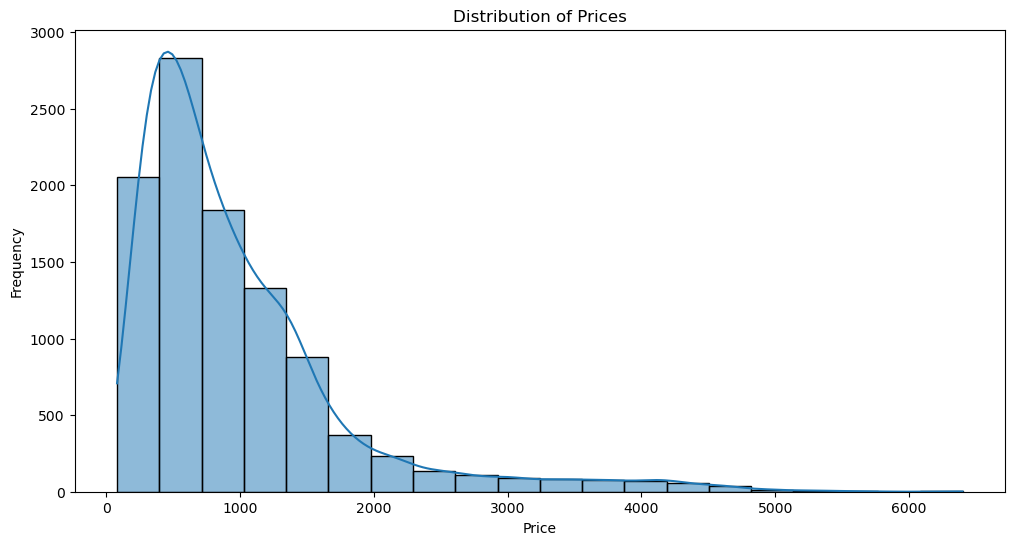

In [9]:
#price distribution
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.histplot(data['priceMod'], bins=20, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [10]:
correlation = data[['quantity', 'priceMod']].corr()
print("Correlation between Quantity and Price:\n", correlation)

Correlation between Quantity and Price:
           quantity  priceMod
quantity  1.000000 -0.056827
priceMod -0.056827  1.000000


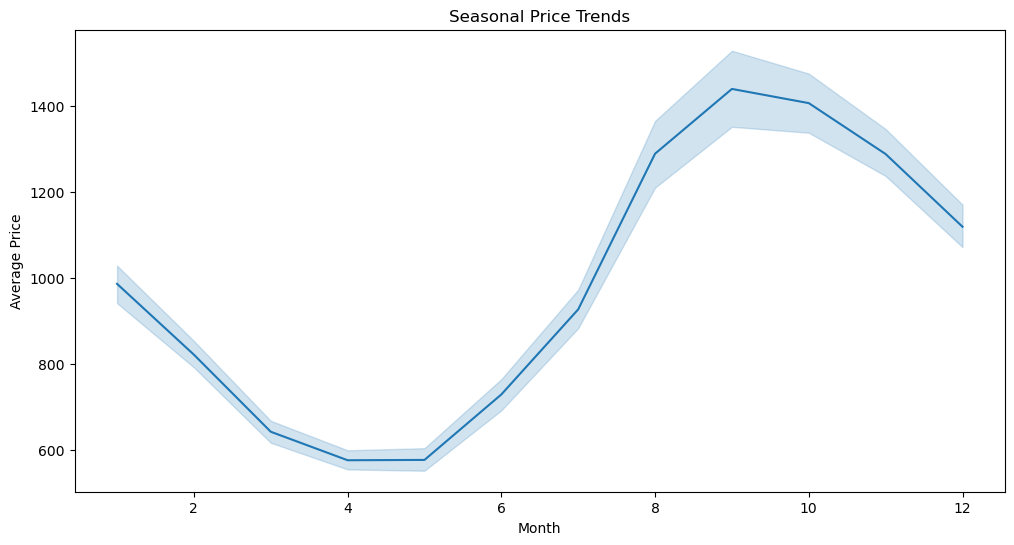

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x=data.index.month, y='priceMod', estimator='mean')
plt.title('Seasonal Price Trends')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.show()

In [12]:
data.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,,,
2005-01-01,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR
2006-01-01,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR
2010-01-01,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR
2011-01-01,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR
2012-01-01,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR


In [13]:
#extracting categorical vlaues
categorical_data=[df for df in data.columns if data[df].dtype==object]
categorical_data

['market', 'month', 'state', 'city']

In [14]:
data['month'].value_counts()

month
February     930
January      929
December     873
November     856
September    855
May          838
October      831
June         827
April        826
July         825
March        820
August       817
Name: count, dtype: int64

In [15]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False)
one_hot_encoded=encoder.fit_transform(data[categorical_data])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_data))
data_encoded=pd.concat([data,one_hot_df])

In [16]:
data_encoded


,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,market_ABOHAR(PB),...,city_SRIGANGANAGAR,city_SRINAGAR,city_SRIRAMPUR,city_SURAT,city_TRIVENDRUM,city_UDAIPUR,city_UJJAIN,city_VANI,city_VARANASI,city_YEOLA
2005-01-01 00:00:00,ABOHAR(PB),January,2005.0,2350.0,404.0,493.0,446.0,PB,ABOHAR,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-01 00:00:00,ABOHAR(PB),January,2006.0,900.0,487.0,638.0,563.0,PB,ABOHAR,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 00:00:00,ABOHAR(PB),January,2010.0,790.0,1283.0,1592.0,1460.0,PB,ABOHAR,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 00:00:00,ABOHAR(PB),January,2011.0,245.0,3067.0,3750.0,3433.0,PB,ABOHAR,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-01 00:00:00,ABOHAR(PB),January,2012.0,1035.0,523.0,686.0,605.0,PB,ABOHAR,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
# Lagged variables
data['priceMod_lag1'] = data['priceMod'].shift(1)  # Lagged priceMod by 1 time step
data['priceMod_lag2'] = data['priceMod'].shift(2)  # Lagged priceMod by 2 time steps

# Rolling statistics
data['rolling_mean_priceMod'] = data['priceMod'].rolling(window=3).mean()  # 3-month rolling mean of priceMod
data['rolling_std_priceMod'] = data['priceMod'].rolling(window=3).std()    # 3-month rolling std dev of priceMod

# # Seasonal indicators
# data['month'] = data['date'].dt.month  # Extract month from date
# data['is_winter'] = data['month'].isin([12, 1, 2])  # Winter season indicator
# data['is_summer'] = data['month'].isin([6, 7, 8])   # Summer season indicator

# # Display the engineered features
# print(data[['date', 'priceMod', 'priceMod_lag1', 'priceMod_lag2', 
#             'rolling_mean_priceMod', 'rolling_std_priceMod', 
#             'is_winter', 'is_summer']].head())

In [18]:
#data['priceMod_lag1']

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
#from fbprophet import Prophet
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

data = data.sort_values(by='date')

# Extract target variable
y = data['priceMod'].values

# Split data into train and test sets
train_size = int(len(data) * 0.8)
train, test = y[:train_size], y[train_size:]

# ARIMA Model
model_arima = ARIMA(train, order=(5,1,0))
model_arima_fit = model_arima.fit()
arima_forecast = model_arima_fit.forecast(steps=len(test))[0]

# SARIMA Model
model_sarima = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_sarima_fit = model_sarima.fit()
sarima_forecast = model_sarima_fit.forecast(steps=len(test))



# LSTM Model
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(y.reshape(-1, 1))
look_back = 12  # number of previous time steps to use as input variables
X, y = [], []
for i in range(len(scaled_data)-look_back):
    X.append(scaled_data[i:i+look_back, 0])
    y.append(scaled_data[i+look_back, 0])
X, y = np.array(X), np.array(y)

X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # Reshape input for LSTM

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dense(units=1))

model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions with LSTM model
lstm_forecast = model_lstm.predict(X_test)
lstm_forecast = scaler.inverse_transform(lstm_forecast)

# Evaluate models
arima_rmse = np.sqrt(mean_squared_error(test, arima_forecast))
sarima_rmse = np.sqrt(mean_squared_error(test, sarima_forecast))
prophet_rmse = np.sqrt(mean_squared_error(prophet_forecast['yhat'].tail(len(test)), test))
lstm_rmse = np.sqrt(mean_squared_error(lstm_forecast, test))

print("ARIMA RMSE:", arima_rmse)
print("SARIMA RMSE:", sarima_rmse)
print("Prophet RMSE:", prophet_rmse)
print("LSTM RMSE:", lstm_rmse)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(test, label='Actual')
plt.plot(arima_forecast, label='ARIMA Forecast')
plt.plot(sarima_forecast, label='SARIMA Forecast')
#plt.plot(prophet_forecast['yhat'].tail(len(test)), label='Prophet Forecast')
plt.plot(lstm_forecast, label='LSTM Forecast')
plt.legend()
plt.title('Forecast Comparison')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.26232D+00    |proj g|=  6.95259D-02

At iterate    5    f=  7.20162D+00    |proj g|=  9.71160D-03

At iterate   10    f=  7.19360D+00    |proj g|=  5.07593D-03

At iterate   15    f=  7.10769D+00    |proj g|=  1.39779D-01

At iterate   20    f=  7.06464D+00    |proj g|=  2.84074D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     28      1     0     0   1.209D-05   7.065D+00
  F =   7.0646136217093671     

CONVERG

/Users/vaishalikant/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0039
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0024
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0022
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0023
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0021
Epoch 6/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0020
Epoch 7/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0019
Epoch 8/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0022
Epoch 9/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0021
Epoch 10/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0021
Epoch 11/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0021
Epoch 12/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0022
Epoch 13/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0021
Epoch 14/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0022
Epoch 15/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step -

InvalidParameterError: The 'y_pred' parameter of mean_squared_error must be an array-like. Got 1628.7922527109408 instead.

In [ ]:
#pip install tensorflow
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming 'test' contains the actual values and 'forecast' contains the predicted values

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test, arima_forecast)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test, sarima_forecast)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


In [ ]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

# Define a function to create the LSTM model
def create_lstm_model(units=50, dropout_rate=0.0):
    model = Sequential()
    model.add(LSTM(units=units, dropout=dropout_rate, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(units=units, dropout=dropout_rate))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create a KerasRegressor wrapper for the LSTM model
model = KerasRegressor(build_fn=create_lstm_model, epochs=100, batch_size=32, verbose=0)

# Define the hyperparameters to search
param_grid = {
    'units': [50, 100, 150],
    'dropout_rate': [0.0, 0.1, 0.2]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search_result = grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search_result.best_params_)
print("Best Score:", grid_search_result.best_score_)
